<a href="https://colab.research.google.com/github/DiegoOCruz/Intelig-ncia_Artificial_Classifica-o/blob/main/TP2_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
url = 'https://raw.githubusercontent.com/cassiusf/datasets/refs/heads/main/titanic_data.csv'
df = pd.read_csv(url)
#print(df.head())
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('Cabin', axis=1, inplace=True)
#print(df.head())


#Eliminar observações que contenham dados ausentes (NA)
df = df.dropna()
#print(df.head())

#aplicar LabelEncoder nas variáveis `'Embarked'` e `'Sex'`.
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df['Sex'] = le.fit_transform(df['Sex'])
#print(df.head())

In [ ]:
#Separe o dataframe resultante em Treino-Teste, utilizando a proporção 75-25%.

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#print(X_train.head())
#print(y_train.head())

In [ ]:
#aplicando um modelo SVM utilizando um Kernel linear

# Escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar modelo SVM linear
svm_model = SVC(kernel='linear', random_state=42)

# Treinar
svm_model.fit(X_train_scaled, y_train)

# Previsões
y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)

# Avaliar acurácia
print("Acurácia Treino:", accuracy_score(y_train, y_pred_train))
print("Acurácia Teste:", accuracy_score(y_test, y_pred_test))

Acurácia Treino: 0.7902621722846442
Acurácia Teste: 0.7471910112359551


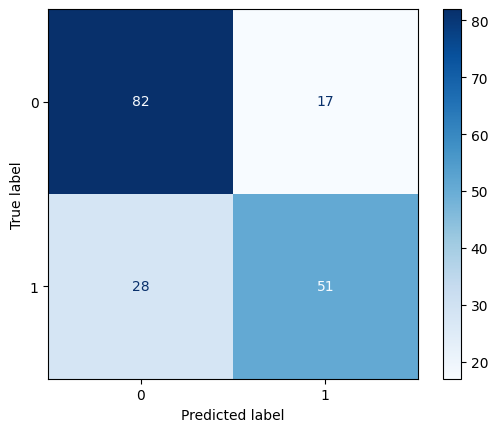

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Exibir
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap="Blues")
plt.show()

In [ ]:
# Métricas
acc = accuracy_score(y_test, y_pred_test)
prec = precision_score(y_test, y_pred_test)
rec = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Acurácia:", acc)
print("Precisão:", prec)
print("Recall:", rec)
print("F1-score:", f1)

# Relatório completo
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_test))


Acurácia: 0.7471910112359551
Precisão: 0.75
Recall: 0.6455696202531646
F1-score: 0.6938775510204082

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.75      0.83      0.78        99
           1       0.75      0.65      0.69        79

    accuracy                           0.75       178
   macro avg       0.75      0.74      0.74       178
weighted avg       0.75      0.75      0.74       178




=== Kernel: RBF ===


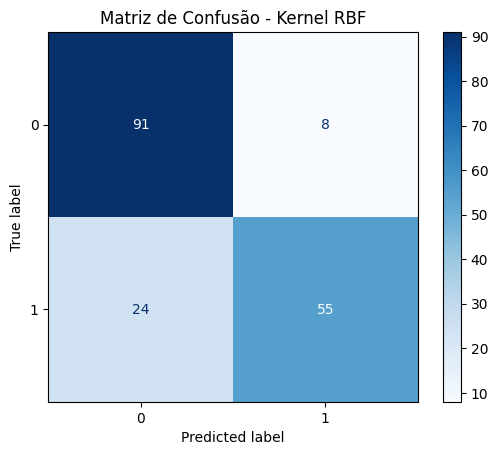

Acurácia: 0.8202247191011236
Precisão: 0.873015873015873
Recall: 0.6962025316455697
F1-score: 0.7746478873239436

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        99
           1       0.87      0.70      0.77        79

    accuracy                           0.82       178
   macro avg       0.83      0.81      0.81       178
weighted avg       0.83      0.82      0.82       178


=== Kernel: SIGMOID ===


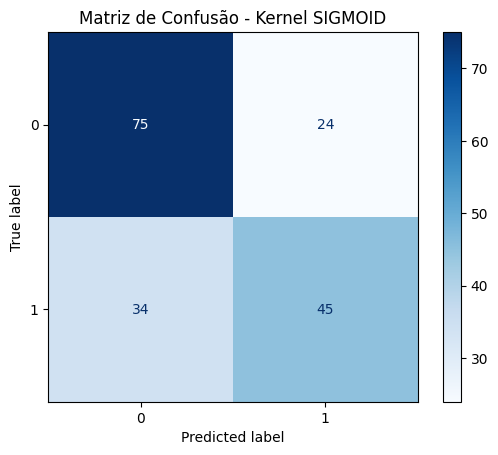

Acurácia: 0.6741573033707865
Precisão: 0.6521739130434783
Recall: 0.569620253164557
F1-score: 0.6081081081081081

Relatório de classificação:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72        99
           1       0.65      0.57      0.61        79

    accuracy                           0.67       178
   macro avg       0.67      0.66      0.66       178
weighted avg       0.67      0.67      0.67       178



In [ ]:
# Função auxiliar para treinar e avaliar
def treinar_avaliar_svm(kernel_name):
    print(f"\n=== Kernel: {kernel_name.upper()} ===")

    # Criar modelo
    svm_model = SVC(kernel=kernel_name, random_state=42)

    # Treinar
    svm_model.fit(X_train_scaled, y_train)

    # Previsões
    y_pred = svm_model.predict(X_test_scaled)

    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
    disp.plot(cmap="Blues")
    plt.title(f"Matriz de Confusão - Kernel {kernel_name.upper()}")
    plt.show()

    # Métricas
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Acurácia:", acc)
    print("Precisão:", prec)
    print("Recall:", rec)
    print("F1-score:", f1)

    print("\nRelatório de classificação:")
    print(classification_report(y_test, y_pred))

# Rodar para RBF e Sigmoid
treinar_avaliar_svm("rbf")
treinar_avaliar_svm("sigmoid")


Questão 4

O kernel RBF apresentou o melhor desempenho, atingindo acurácia de 82%, precisão de 87%, recall de 70% e F1-score de 77%. O kernel linear obteve resultados intermediários, com acurácia de 75% e F1-score de 69%, enquanto o kernel sigmoid foi o que apresentou pior desempenho, com acurácia de apenas 67% e F1-score de 61%. Dessa forma, conclui-se que, neste experimento, o modelo SVM com kernel RBF se mostrou a alternativa mais adequada, por oferecer um melhor equilíbrio entre as métricas de avaliação e maior capacidade de generalização sobre os dados analisados.